In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define the Data ---
def create_letter_patterns():
    """Defines binary patterns for letters A, B, and C."""
    # Each letter is a 5x6 grid, represented as a 1D array of 30 pixels.
    # 0 = white, 1 = black
    patterns = {
        'A': np.array([0, 1, 1, 1, 0,
                       1, 0, 0, 0, 1,
                       1, 1, 1, 1, 1,
                       1, 0, 0, 0, 1,
                       1, 0, 0, 0, 1,
                       0, 0, 0, 0, 0]),
        'B': np.array([1, 1, 1, 1, 0,
                       1, 0, 0, 0, 1,
                       1, 1, 1, 1, 0,
                       1, 0, 0, 0, 1,
                       1, 0, 0, 0, 1,
                       1, 1, 1, 1, 0]),
        'C': np.array([0, 1, 1, 1, 0,
                       1, 0, 0, 0, 0,
                       1, 0, 0, 0, 0,
                       1, 0, 0, 0, 0,
                       1, 0, 0, 0, 0,
                       0, 1, 1, 1, 0])
    }
    return patterns

# Prepare the training data and labels
patterns = create_letter_patterns()
X = np.array([patterns['A'], patterns['B'], patterns['C']]).T  # Transpose to get 30x3
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]).T  # One-hot encoded, 3x3


In [21]:
# --- 2. Initialize the Network ---
# Network architecture
input_size = 30
hidden_size = 15
output_size = 3

# Initialize weights and biases
np.random.seed(42)  # for reproducibility
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))



In [22]:
# --- 3. Implement Core Functions ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# --- 4. Training Loop ---
epochs = 50000
learning_rate = 0.5
loss_history = []
accuracy_history = []

for i in range(epochs):
    # Feedforward Propagation
    # Layer 1 (Hidden Layer)
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    # Layer 2 (Output Layer)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Backpropagation
    # Output Layer
    dZ2 = A2 - y  # Derivative of loss w.r.t Z2 (for MSE)
    dW2 = (1 / output_size) * np.dot(dZ2, A1.T)
    db2 = (1 / output_size) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden Layer
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = (1 / hidden_size) * np.dot(dZ1, X.T)
    db1 = (1 / hidden_size) * np.sum(dZ1, axis=1, keepdims=True)

    # Update Weights and Biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Calculate Loss and Accuracy
    if i % 1000 == 0:
        loss = np.mean(np.square(A2 - y))
        loss_history.append(loss)

        predictions = np.argmax(A2, axis=0)
        true_labels = np.argmax(y, axis=0)
        accuracy = np.mean(predictions == true_labels) * 100
        accuracy_history.append(accuracy)

        print(f'Epoch {i}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%')



Epoch 0, Loss: 0.2500, Accuracy: 33.33%
Epoch 1000, Loss: 0.0000, Accuracy: 100.00%
Epoch 2000, Loss: 0.0000, Accuracy: 100.00%
Epoch 3000, Loss: 0.0000, Accuracy: 100.00%
Epoch 4000, Loss: 0.0000, Accuracy: 100.00%
Epoch 5000, Loss: 0.0000, Accuracy: 100.00%
Epoch 6000, Loss: 0.0000, Accuracy: 100.00%
Epoch 7000, Loss: 0.0000, Accuracy: 100.00%
Epoch 8000, Loss: 0.0000, Accuracy: 100.00%
Epoch 9000, Loss: 0.0000, Accuracy: 100.00%
Epoch 10000, Loss: 0.0000, Accuracy: 100.00%
Epoch 11000, Loss: 0.0000, Accuracy: 100.00%
Epoch 12000, Loss: 0.0000, Accuracy: 100.00%
Epoch 13000, Loss: 0.0000, Accuracy: 100.00%
Epoch 14000, Loss: 0.0000, Accuracy: 100.00%
Epoch 15000, Loss: 0.0000, Accuracy: 100.00%
Epoch 16000, Loss: 0.0000, Accuracy: 100.00%
Epoch 17000, Loss: 0.0000, Accuracy: 100.00%
Epoch 18000, Loss: 0.0000, Accuracy: 100.00%
Epoch 19000, Loss: 0.0000, Accuracy: 100.00%
Epoch 20000, Loss: 0.0000, Accuracy: 100.00%
Epoch 21000, Loss: 0.0000, Accuracy: 100.00%
Epoch 22000, Loss: 0.000


Training complete!


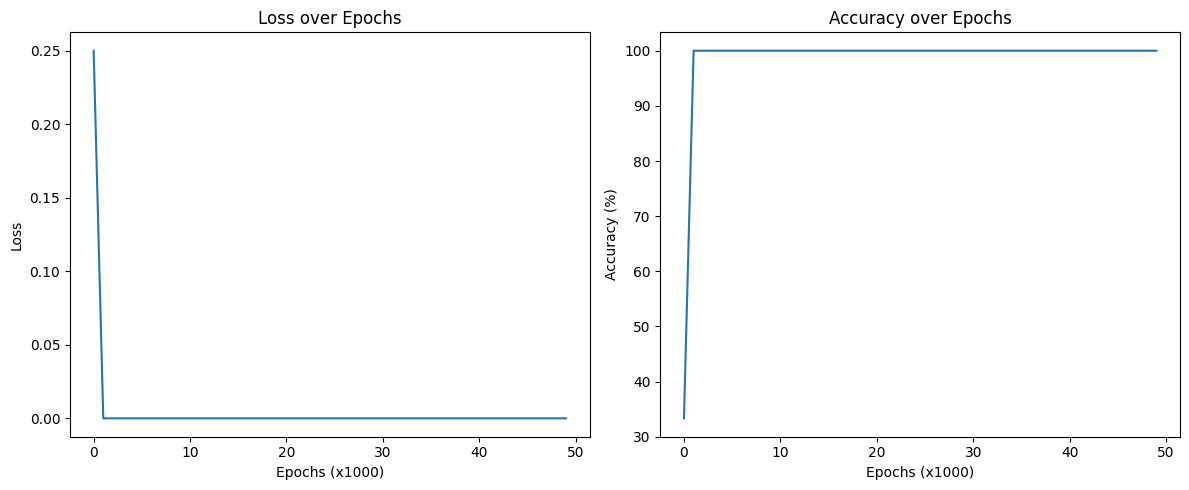

In [24]:
# --- 5. Visualization and Prediction ---
print("\nTraining complete!")

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epochs (x1000)')
plt.ylabel('Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs (x1000)')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()




Testing the model with letter 'A'...


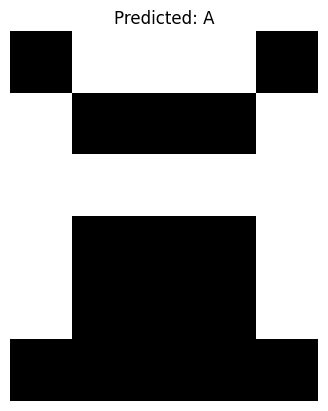

Prediction Probabilities: [9.99953874e-01 3.48051679e-05 1.83861686e-05]
Predicted class index: 0 -> A

Testing the model with letter 'B'...


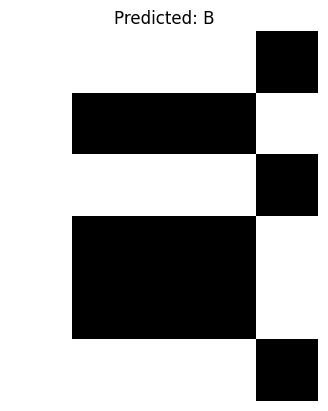

Prediction Probabilities: [3.76787499e-05 9.99947337e-01 2.76112842e-05]
Predicted class index: 1 -> B

Testing the model with letter 'C'...


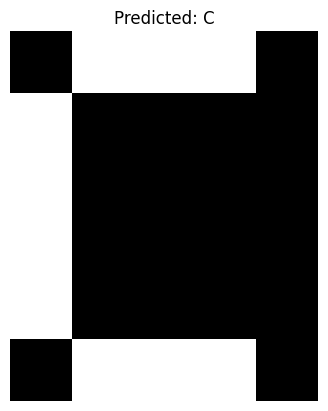

Prediction Probabilities: [1.61830754e-05 2.84249872e-05 9.99963649e-01]
Predicted class index: 2 -> C


In [25]:
# --- Test the trained model ---
def predict_and_display(input_data, W1, b1, W2, b2):
    # Feedforward to get prediction
    Z1 = np.dot(W1, input_data.reshape(-1, 1)) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Get the predicted class
    prediction = np.argmax(A2, axis=0)
    letters = ['A', 'B', 'C']
    predicted_letter = letters[prediction[0]]

    # Display the input image
    input_image = input_data.reshape(6, 5)
    plt.imshow(input_image, cmap='gray')
    plt.title(f'Predicted: {predicted_letter}')
    plt.axis('off')
    plt.show()

    print(f"Prediction Probabilities: {A2.T[0]}")
    print(f"Predicted class index: {prediction[0]} -> {predicted_letter}")

# Test with a pattern for 'A'
print("\nTesting the model with letter 'A'...")
predict_and_display(patterns['A'], W1, b1, W2, b2)

# Test with a pattern for 'B'
print("\nTesting the model with letter 'B'...")
predict_and_display(patterns['B'], W1, b1, W2, b2)

# Test with a pattern for 'C'
print("\nTesting the model with letter 'C'...")
predict_and_display(patterns['C'], W1, b1, W2, b2)